In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Analysis

In [2]:
cars = pd.read_csv("../Data/car_prices.csv", on_bad_lines='skip')

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Numeric Variable Relationships

- Selling Price variations according to condition, distance travelled and recemmended sales price (mmr)

In [6]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]
cars_filtered=cars.query('body in @style_list')

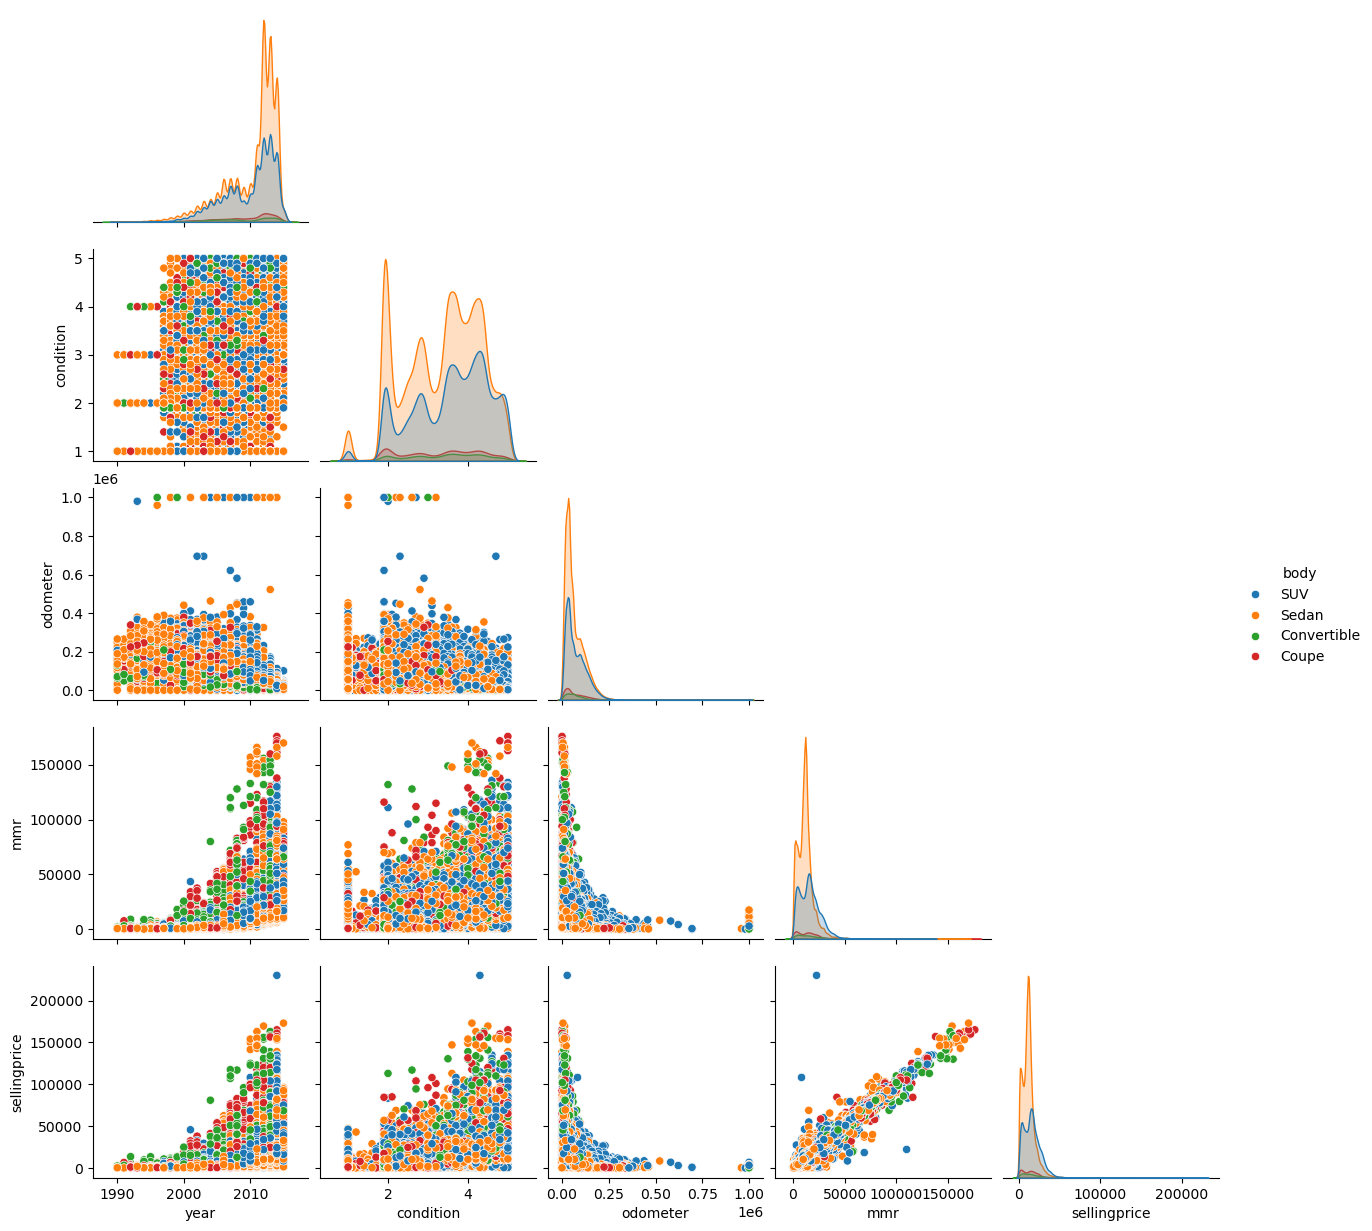

In [7]:
sns.pairplot(cars_filtered, corner=True, hue='body')

#### Correlation Heat Map

* Heatmap of the correlation between the numeric variables.


<Axes: >

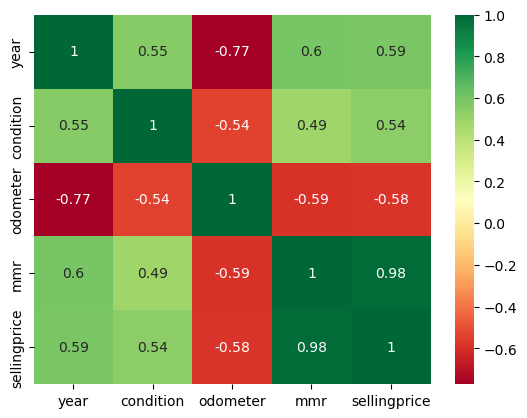

In [8]:
sns.heatmap(cars.select_dtypes(include='number').corr(), cmap='RdYlGn', annot=True)

#### Value Retention

* Linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by popular car brands (make).

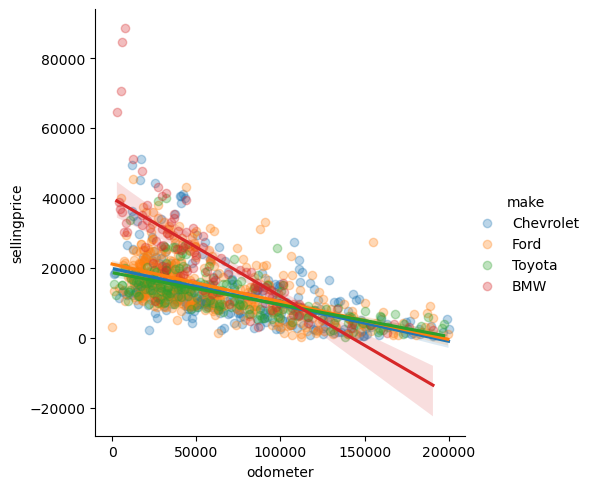

In [9]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']
filtered_cars= cars.query('make in @brand_list')
sns.lmplot(x='odometer', y='sellingprice', data=filtered_cars.query('sellingprice <150000 and odometer < 200000').sample(1000), hue='make',scatter_kws=({"alpha": .3}),)


# Categorical Variable Relationships

* Barplot of the average price by condition.

In [10]:
bins=np.linspace(1,5,9)
labels=["1-1.5","1.5-2","2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5","4.5-5"]

In [11]:
bar_data=cars.assign(condition_range=pd.cut(cars["condition"], bins=bins, labels=labels))

In [12]:
bar_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_range
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5-5
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5-5
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),4-4.5
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),4-4.5
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),4-4.5


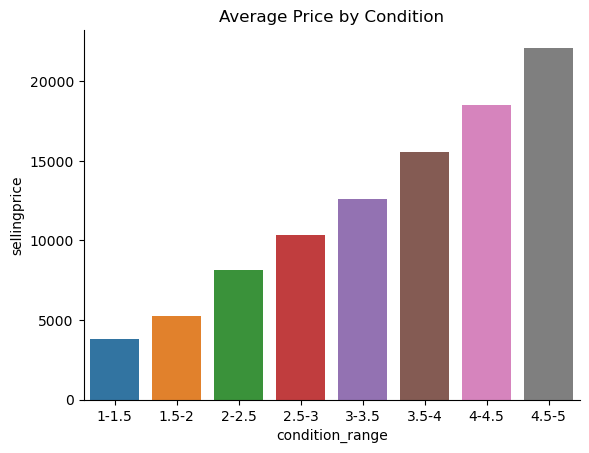

In [13]:
ax=sns.barplot(data=bar_data, x="condition_range", y="sellingprice", hue="condition_range", errorbar=None)
ax.get_legend().remove()
ax.set_title("Average Price by Condition")
sns.despine()

# Price by make and condition

* Variation of Selling Price of 10 most common cars sold based on condition.

In [14]:
cars['make'].value_counts().head(10).index

Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object', name='make')

In [15]:
top_10=['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler']

In [16]:
cars_pivot=bar_data.loc[bar_data["make"].isin(top_10)].pivot_table(index="make", columns="condition_range", values={"sellingprice":"mean"})

C:\Users\prasa\AppData\Local\Temp\ipykernel_14228\997931604.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cars_pivot=bar_data.loc[bar_data["make"].isin(top_10)].pivot_table(index="make", columns="condition_range", values={"sellingprice":"mean"})


In [17]:
cars_pivot

sellingprice                                           \
condition_range        1-1.5        1.5-2         2-2.5         2.5-3   
make                                                                    
BMW              4326.923077  6848.680865  10478.320029  12795.277669   
Chevrolet        3021.031746  5384.030601   7425.967945  10325.668781   
Chrysler         2354.545455  4301.224656   5367.031437   9077.602013   
Dodge            4094.907407  5299.306603   7127.988641   9840.543230   
Ford             4175.866667  5282.734146   8550.886379  10954.656807   
Honda            5418.181818  5013.392857   7924.010577   9179.641598   
Hyundai          3089.285714  5124.115218   7283.134792   8600.312323   
Kia              4710.000000  4208.728571   6639.857005   8147.949483   
Nissan           4592.682927  5509.596553   8431.096744  10016.940794   
Toyota           5304.545455  5876.940329   8438.789013   9851.481564   

                                                                         
condition_range         3-3.5         3.5-4         4-4.5         4.5-5  
make                                                                     
BMW              16397.610281  21911.286118  28791.890310  35902.992693  
Chevrolet        11622.675195  14436.514288  16733.687841  21580.124553  
Chrysler          9247.621069  14813.315207  15212.500990  18388.446281  
Dodge            10517.710952  14051.693213  14893.500000  18400.000000  
Ford             13394.647490  15374.553012  17820.920366  20810.886556  
Honda            11618.430007  13724.741442  16415.864917  19317.726330  
Hyundai          10312.067568  11704.661821  13483.934264  16502.773497  
Kia              10236.522039  11998.424662  13986.038947  16246.605411  
Nissan           11893.454024  13056.597333  14654.276116  16105.622175  
Toyota           12023.032821  14271.166362  16420.315016  19970.274684

<Axes: xlabel='condition_range', ylabel='make'>

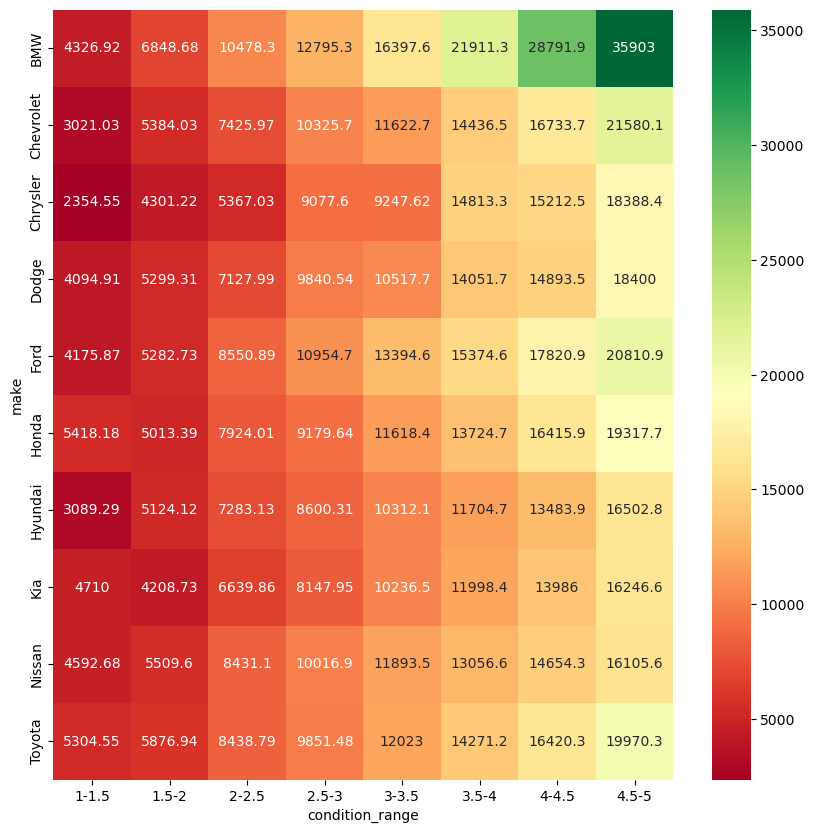

In [20]:
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cars_pivot.droplevel(0, axis=1), cmap="RdYlGn", annot=True, fmt='g')

# Ford F-150 Deep Dive

* Analysing the top selling car  

In [21]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST)
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)


<Axes: xlabel='sellingprice', ylabel='Count'>

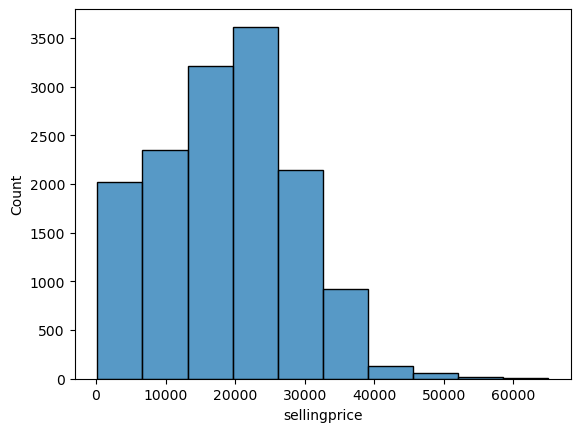

In [22]:
sns.histplot(f150s, x='sellingprice', bins=10)

* Barplot of `Selling` price by `Variant (trim)` for the F150s.

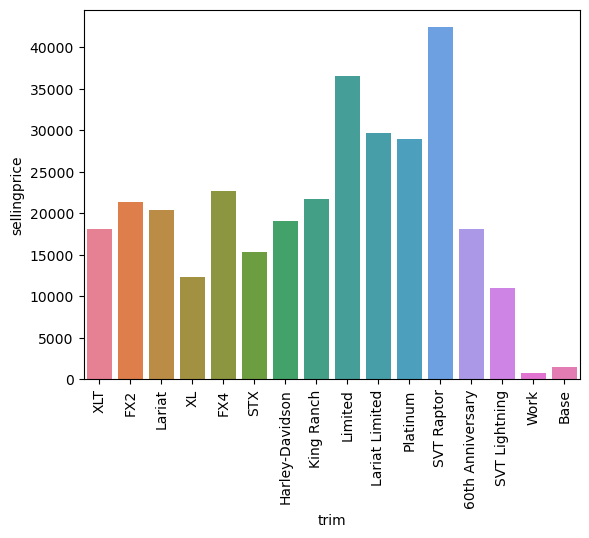

In [23]:
sns.barplot(data=cars.loc[cars['model']=="F-150"], x='trim', y='sellingprice', hue='trim', errorbar=None)
plt.xticks(rotation=90);

* Exploring the popular variants

In [24]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

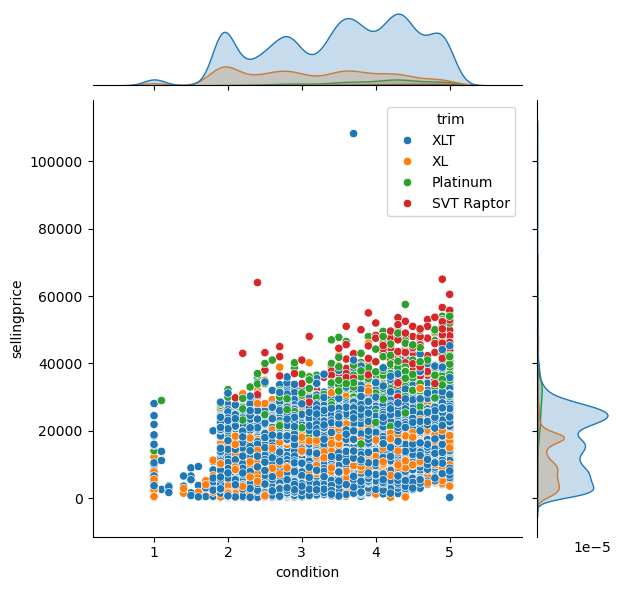

In [25]:
sns.jointplot(data=cars.query('trim in @trim_list'), x='condition', y='sellingprice', hue='trim', kind='scatter')

### Are there any "Deals"?

* Which color sells for more than the recommended price?

In [26]:
bar_plot_data=cars.assign(diff_to_mmr = cars["sellingprice"]-cars["mmr"])

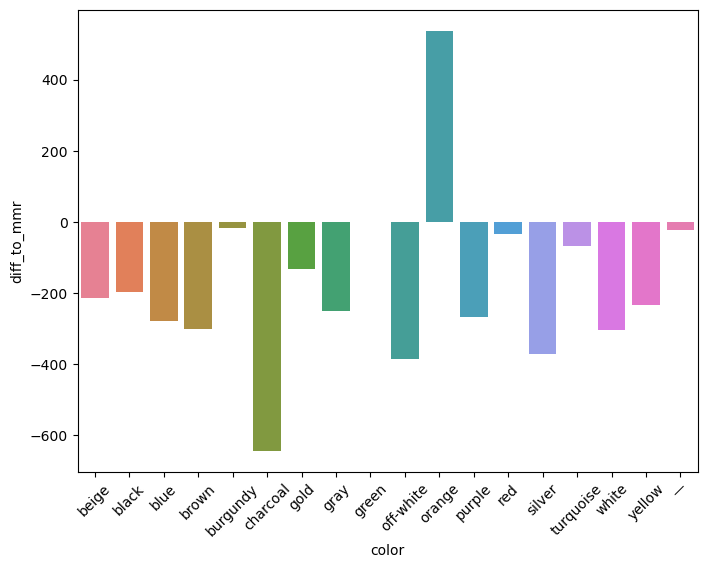

In [27]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bar_plot_data.query('model in ["F-150"]').sort_values('color'),x='color',y='diff_to_mmr',hue='color', errorbar=None)
ax.legend().remove()
plt.xticks(rotation=45);

* Trucks from years between 2009 and 2014. 

In [28]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

In [29]:
cars_filtered1=cars.query("trim in @trim_list and 2009<=year<=2014 and color!='orange' and model in ['F-150']")

In [30]:
bins=np.linspace(1,5,9)
labels=["1-1.5","1.5-2","2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5","4.5-5"]

In [31]:
heat_data=cars_filtered1.assign(condition_range=pd.cut(cars_filtered1["condition"], bins=bins, labels=labels))

In [32]:
heat_data=heat_data.pivot_table(index='trim', columns='condition_range', values={'sellingprice':'mean'})

C:\Users\prasa\AppData\Local\Temp\ipykernel_14228\1814216934.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data=heat_data.pivot_table(index='trim', columns='condition_range', values={'sellingprice':'mean'})


<Axes: xlabel='condition_range', ylabel='trim'>

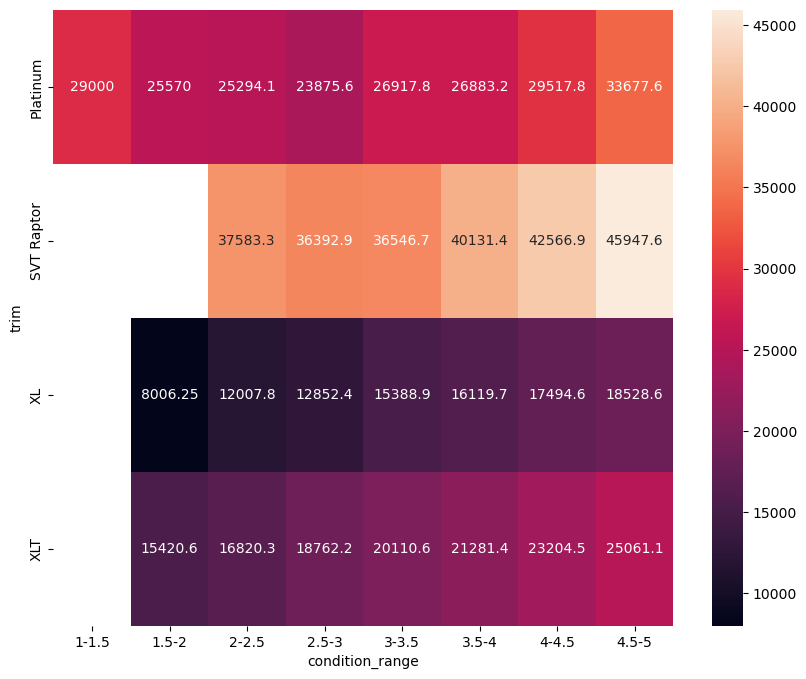

In [33]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data=heat_data.droplevel(0, axis=1), annot=True, fmt='g')

### Best state to buy trucks in?

* XLT variant seems good to buy.
* Filtering out good condition cars with good prices and deciding which state is best to buy cars.

In [34]:
f150s = cars[cars["model"] == "F-150"]
f150s = f150s.assign(diff_to_mmr = f150s["sellingprice"] - f150s["mmr"])
f150s_reduced = f150s.query("color != 'orange' and trim in @trim_list")

In [35]:
f150s_XLT = (f150s_reduced
             .query("trim == 'XLT' and condition >= 3.5")
             .groupby(['state'], as_index=False)
             .agg(
                 mean_diff=("diff_to_mmr", 'mean'),
                 auto_count=("diff_to_mmr", "count")
             )
)


In [36]:
f150s_XLT.head()

,state,mean_diff,auto_count
0,ab,-3249.545455,55
1,al,-5900.000000,1
2,az,-539.705882,17
3,ca,1023.768473,203
4,co,497.222222,108


C:\Users\prasa\AppData\Local\Temp\ipykernel_14228\4202637538.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\prasa\AppData\Local\Temp\ipykernel_14228\4202637538.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right');


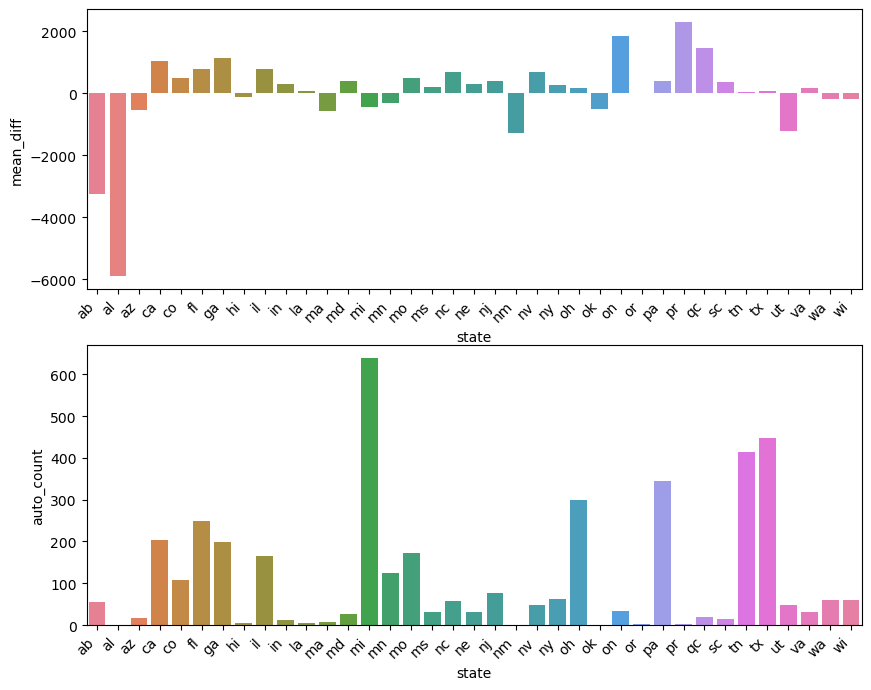

In [37]:
fig, ax= plt.subplots(2,1,figsize=(10,8))

sns.barplot(data=f150s_XLT, x='state', y='mean_diff', ax=ax[0], hue='state')
sns.barplot(data=f150s_XLT, x='state', y='auto_count', ax=ax[1], hue='state')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right');

* Looks like Utah has a good amount of quantity and a low average price.

In [38]:
f150s.query("trim=='XLT' and state == 'ut' and condition > 3.5").groupby("saledate").agg({"diff_to_mmr":["mean", "count"]})

diff_to_mmr      
                                                mean count
saledate                                                  
Wed Feb 04 2015 03:30:00 GMT-0800 (PST) -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST) -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST) -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT) -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)  -600.000000     5